## Importing necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

## Load the dataset

In [8]:
rental_data = pd.read_excel('HalifaxRentals.xlsx')

In [3]:
# View the first few rows of the DataFrame
print(rental_data.head())

         Sitename              Listing Name ApartmentSize MonthlyRent  \
0  apartments.com  Park Victoria Apartments           614        2110   
1  apartments.com  Park Victoria Apartments           830        2640   
2  apartments.com      19 Twenty Apartments           507        2030   
3  apartments.com      19 Twenty Apartments           700        2200   
4  apartments.com      19 Twenty Apartments           890        2725   

  Location Bedroom Bathroom                                            Address  
0  Halifax       1        1  1333 South Park St , Halifax , NS B3J 2K9 â€“ ...  
1  Halifax       2        1  1333 South Park St , Halifax , NS B3J 2K9 â€“ ...  
2  Halifax       0        1  1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H...  
3  Halifax       1        1  1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H...  
4  Halifax       2        1  1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H...  


In [9]:
# Get summary statistics of numeric columns
print(rental_data.describe())

       ApartmentSize  MonthlyRent     Bedroom    Bathroom
count     586.000000   586.000000  586.000000  586.000000
mean      960.281570  2233.706485    1.732082    1.204778
std       452.777096   676.550370    0.914215    0.473082
min       100.000000   130.000000    0.000000    1.000000
25%       700.000000  1795.000000    1.000000    1.000000
50%       895.000000  2200.000000    2.000000    1.000000
75%      1150.000000  2598.000000    2.000000    1.000000
max      4400.000000  6600.000000    5.000000    4.000000


In [10]:
# Display the DataFrame
rental_data

,Sitename,Listing Name,ApartmentSize,MonthlyRent,Location,Bedroom,Bathroom,Address
0,apartments.com,Park Victoria Apartments,614,2110,Halifax,1,1.0,"1333 South Park St , Halifax , NS B3J 2K9 â€“ ..."
1,apartments.com,Park Victoria Apartments,830,2640,Halifax,2,1.0,"1333 South Park St , Halifax , NS B3J 2K9 â€“ ..."
2,apartments.com,19 Twenty Apartments,507,2030,Halifax,0,1.0,"1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H..."
3,apartments.com,19 Twenty Apartments,700,2200,Halifax,1,1.0,"1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H..."
4,apartments.com,19 Twenty Apartments,890,2725,Halifax,2,1.0,"1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H..."
...,...,...,...,...,...,...,...,...
581,Kijiji.ca,"May 1st-September1 st , Studio Downtown Halifax",450,1750,Halifax,0,1.0,"Tobin Street, Halifax, NS"
582,Kijiji.ca,APARTMENT FOR SUBLET,672,1420,Halifax,2,1.0,"5651 Ogilvie St, Halifax, B3H 1B9"
583,Kijiji.ca,1 Bed 1 Bath Apartment in South End,564,2000,Halifax,1,1.0,"Seymour Street, Halifax, NS"
584,Kijiji.ca,Clayton Park - Two Bedroom - **Sorry Rented**,1350,2095,Halifax,2,2.0,"Halifax, NS B3S 1P4"


## Data preprocessing

In [14]:
# Data Cleaning - Dropping Missing Values:
rental_data.dropna(inplace=True)
# Explanation: Removes any rows with missing values (NaNs) from the DataFrame and updates the DataFrame in place.

In [19]:
# Display the DataFrame
# Get summary statistics of numeric columns
print(rental_data.describe())
rental_data

       ApartmentSize  MonthlyRent     Bedroom    Bathroom
count     586.000000   586.000000  586.000000  586.000000
mean      960.281570  2233.706485    1.732082    1.204778
std       452.777096   676.550370    0.914215    0.473082
min       100.000000   130.000000    0.000000    1.000000
25%       700.000000  1795.000000    1.000000    1.000000
50%       895.000000  2200.000000    2.000000    1.000000
75%      1150.000000  2598.000000    2.000000    1.000000
max      4400.000000  6600.000000    5.000000    4.000000


,Sitename,Listing Name,ApartmentSize,MonthlyRent,Location,Bedroom,Bathroom,Address
0,apartments.com,Park Victoria Apartments,614,2110,Halifax,1,1.0,"1333 South Park St , Halifax , NS B3J 2K9 â€“ ..."
1,apartments.com,Park Victoria Apartments,830,2640,Halifax,2,1.0,"1333 South Park St , Halifax , NS B3J 2K9 â€“ ..."
2,apartments.com,19 Twenty Apartments,507,2030,Halifax,0,1.0,"1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H..."
3,apartments.com,19 Twenty Apartments,700,2200,Halifax,1,1.0,"1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H..."
4,apartments.com,19 Twenty Apartments,890,2725,Halifax,2,1.0,"1920 Brunswick St , Halifax , NS B3J 0C5 â€“ H..."
...,...,...,...,...,...,...,...,...
581,Kijiji.ca,"May 1st-September1 st , Studio Downtown Halifax",450,1750,Halifax,0,1.0,"Tobin Street, Halifax, NS"
582,Kijiji.ca,APARTMENT FOR SUBLET,672,1420,Halifax,2,1.0,"5651 Ogilvie St, Halifax, B3H 1B9"
583,Kijiji.ca,1 Bed 1 Bath Apartment in South End,564,2000,Halifax,1,1.0,"Seymour Street, Halifax, NS"
584,Kijiji.ca,Clayton Park - Two Bedroom - **Sorry Rented**,1350,2095,Halifax,2,2.0,"Halifax, NS B3S 1P4"


##  Exploratory Data Analysis (EDA)

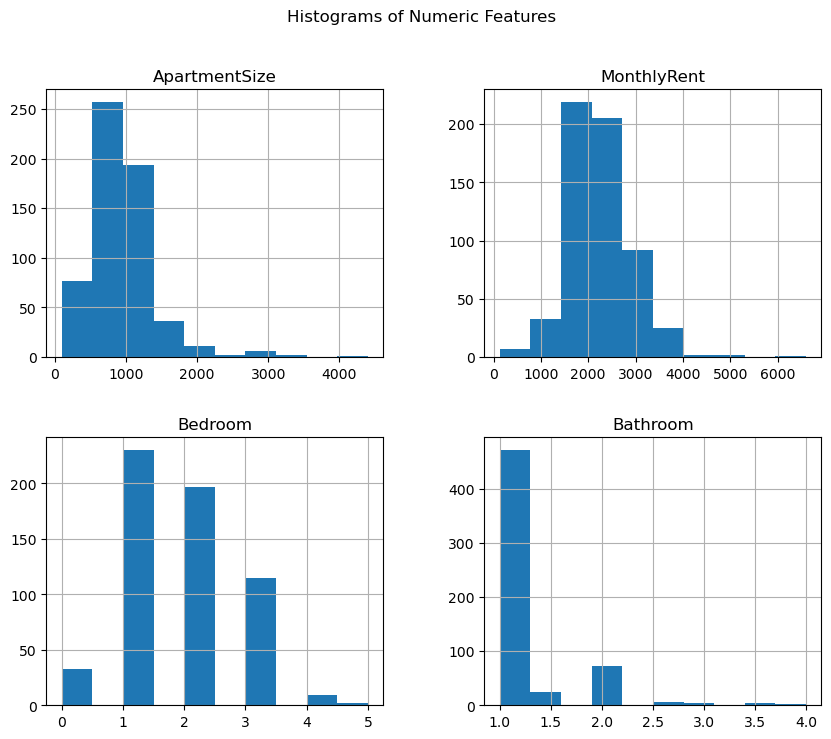

In [16]:
# Histograms of numeric features
rental_data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()

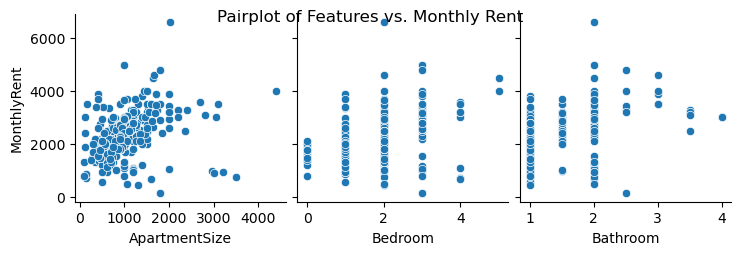

In [20]:
# Pairplot to visualize relationships between features and target variable
sns.pairplot(rental_data, x_vars=['ApartmentSize', 'Bedroom', 'Bathroom'], y_vars='MonthlyRent', kind='scatter')
plt.suptitle('Pairplot of Features vs. Monthly Rent')
plt.show()

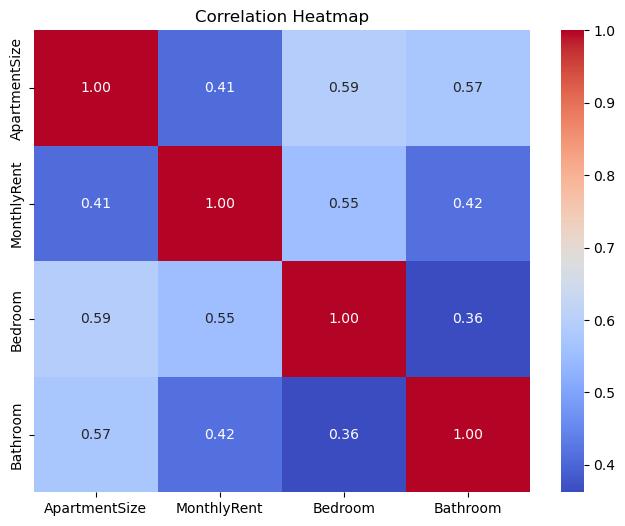

In [21]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rental_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Data Modelling

In [22]:
# Extract relevant variables
features = rental_data[['ApartmentSize', 'Bedroom', 'Bathroom']]
target = rental_data['MonthlyRent']

In [23]:
# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, target, test_size=0.2, random_state=42)

In [24]:
# Feature scaling for regression
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

## Regression

### Linear Regression

Linear Regression Mean Squared Error: 444686.2615771256
Linear Regression Mean Absolute Error: 386.91284043048074


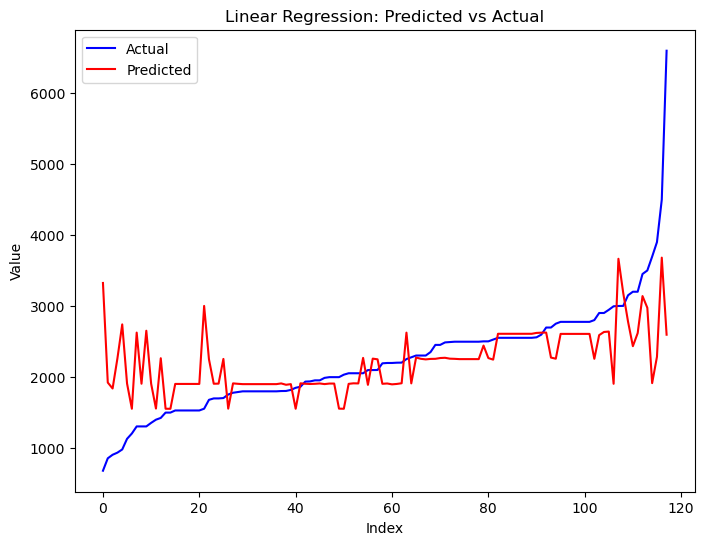

In [25]:
# Modeling - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_linear)
mae_linear = mean_absolute_error(y_test_reg, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)
print("Linear Regression Mean Absolute Error:", mae_linear)

# Sort the test dataset by actual values for better visualization
sorted_indices = y_test_reg.argsort()

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_test_reg)), y_test_reg.iloc[sorted_indices], color='blue', label='Actual')
plt.plot(np.arange(len(y_test_reg)), y_pred_linear[sorted_indices], color='red', label='Predicted')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### Ridge Regression

In [27]:
# Modeling - Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled_reg)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression Mean Absolute Error:", mae_ridge)

Ridge Regression Mean Squared Error: 444601.4211905406
Ridge Regression Mean Absolute Error: 386.98514137190205


### Lasso Regression

In [29]:
# Modeling - Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled_reg)
mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_reg, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression Mean Absolute Error:", mae_lasso)

Lasso Regression Mean Squared Error: 444669.4347357107
Lasso Regression Mean Absolute Error: 386.9338301290898


## Classification

### Splitting the data

In [30]:
# Split the dataset into training and testing sets for classification
y_class = np.where(rental_data['MonthlyRent'] <= rental_data['MonthlyRent'].quantile(0.75), 1, 0)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features, y_class, test_size=0.2, random_state=42)

# Feature scaling for classification
scaler_cls = StandardScaler()
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

### Logistic Regression


Logistic Regression Accuracy (Classification): 0.7966101694915254
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        26
           1       0.90      0.83      0.86        92

    accuracy                           0.80       118
   macro avg       0.72      0.76      0.73       118
weighted avg       0.82      0.80      0.81       118

Confusion Matrix:
[[18  8]
 [16 76]]


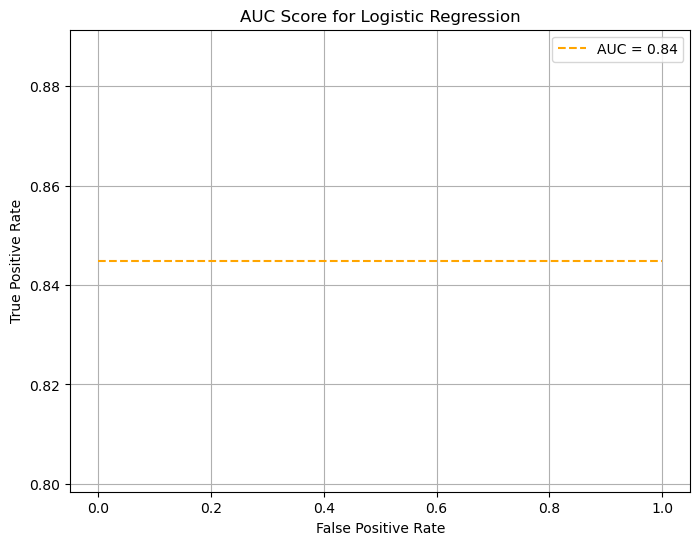

AUC Score: 0.8448996655518395


In [32]:
# Modeling - Logistic Regression for Classification
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Logistic Regression for Classification
y_pred_logistic_cls = logistic_model.predict(X_test_scaled_cls)
accuracy_logistic_cls = accuracy_score(y_test_cls, y_pred_logistic_cls)
print("\nLogistic Regression Accuracy (Classification):", accuracy_logistic_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_logistic_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_logistic_cls))

# Calculate the predicted probabilities for positive class
y_prob_logistic_cls = logistic_model.predict_proba(X_test_scaled_cls)[:, 1]

# Calculate the AUC score
auc_logistic = roc_auc_score(y_test_cls, y_prob_logistic_cls)

# Plotting the AUC score as a horizontal line
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [auc_logistic, auc_logistic], linestyle='--', color='orange', label=f'AUC = {auc_logistic:.2f}')
plt.title('AUC Score for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", auc_logistic)

### Decision Tree

In [33]:
# Modeling - Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Decision Tree Classifier
y_pred_dt_cls = dt_model.predict(X_test_scaled_cls)
accuracy_dt_cls = accuracy_score(y_test_cls, y_pred_dt_cls)
print("\nDecision Tree Classifier Accuracy:", accuracy_dt_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_dt_cls))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_dt_cls))


Decision Tree Classifier Accuracy: 0.8135593220338984
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        26
           1       0.93      0.83      0.87        92

    accuracy                           0.81       118
   macro avg       0.74      0.80      0.76       118
weighted avg       0.85      0.81      0.82       118

Confusion Matrix:
[[20  6]
 [16 76]]


### Random Forest

In [34]:
# Modeling - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Random Forest Classifier
y_pred_rf_cls = rf_model.predict(X_test_scaled_cls)
accuracy_rf_cls = accuracy_score(y_test_cls, y_pred_rf_cls)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_rf_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_rf_cls))


Random Forest Classifier Accuracy: 0.8220338983050848
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.77      0.66        26
           1       0.93      0.84      0.88        92

    accuracy                           0.82       118
   macro avg       0.75      0.80      0.77       118
weighted avg       0.85      0.82      0.83       118

Confusion Matrix:
[[20  6]
 [15 77]]


### Support Vector Classifier

In [35]:
# Modeling - Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Support Vector Classifier (SVC)
y_pred_svc_cls = svc_model.predict(X_test_scaled_cls)
accuracy_svc_cls = accuracy_score(y_test_cls, y_pred_svc_cls)
print("\nSupport Vector Classifier (SVC) Accuracy:", accuracy_svc_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_svc_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_svc_cls))


Support Vector Classifier (SVC) Accuracy: 0.7966101694915254
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.61        26
           1       0.91      0.82      0.86        92

    accuracy                           0.80       118
   macro avg       0.72      0.77      0.74       118
weighted avg       0.83      0.80      0.81       118

Confusion Matrix:
[[19  7]
 [17 75]]
